In [28]:
import numpy as np
from numpy import array
from numpy import corrcoef
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [29]:
def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

In [30]:
dataset = pd.DataFrame() 
#Read the csv file
path = (os.path.abspath(".")) + "/../../../dataset/wine/"
filename = "wine2.csv"
file = path + str(filename)
dataset = pd.read_csv(file, delimiter=";", dtype={
    'Classification':float, 
    'Alcohol':float, 
    'Malic acid':float, 
    'Ash':float, 
    'Alcalinity of ash':float, 
    'Magnesium':float, 
    'Total phenols':float, 
    'Flavanoids':float, 
    'Nonflavanoid phenols':float, 
    'Proanthocyanins':float, 
    'Color intensity':float, 
    'Hue':float, 
    'OD280/OD315 of diluted wines':float, 
    'Proline':float
   })

In [31]:
df = dataset
columns = ['Classification']
df.drop(columns, inplace=True, axis=1)
df.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [32]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

C:\Users\Ramon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


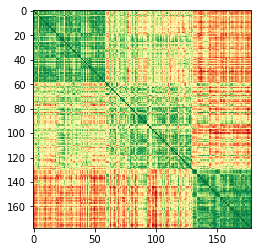

In [33]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.show()

In [48]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_values)
    Sum_of_squared_distances.append(km.inertia_)

Sum_of_squared_distances

[95.5995377847106,
 64.53766702389431,
 48.95403581962662,
 44.906219864605475,
 42.37043092143249,
 39.804709153188995,
 37.96114139560785,
 36.01165484343575,
 34.318537872178425,
 33.33905169604181,
 31.84309403446646,
 31.072685564220414,
 30.05396145336702,
 29.188878714797227]

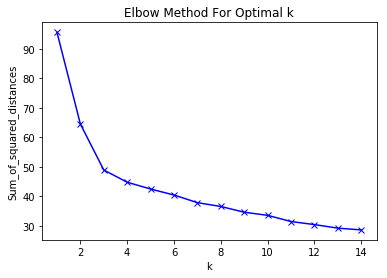

In [41]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

[[0.31137521 0.23689915 0.47291703 0.49991686 0.2477209  0.45305895
  0.38240098 0.4117468  0.39742546 0.14773478 0.47351167 0.58897554
  0.15640099]
 [0.544689   0.47844053 0.56013612 0.53833177 0.31146245 0.24476489
  0.10713464 0.61852487 0.22827646 0.4826404  0.19254989 0.16090576
  0.24739982]
 [0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
  0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
  0.59389397]]


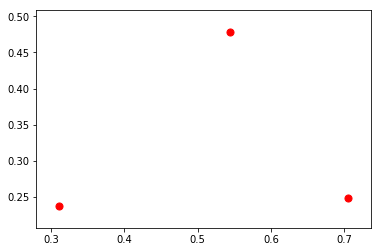

In [47]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

#plt.scatter(df[:, 0], df[:, 1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)